<a href="https://colab.research.google.com/github/praneeth6124/Image_classification.model/blob/main/Image_classification.model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import Dropout


In [ ]:
(X_train,y_train), (X_test,y_test)= datasets.cifar10.load_data()           #Importing the dataset
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']        # The no. of classes=no. of categories,so output layer should have 10 neurons

In [ ]:
classes[5]

'dog'

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

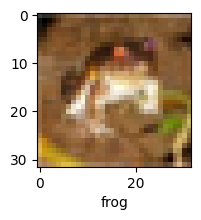

In [ ]:
plot_sample(X_train,y_train,0)

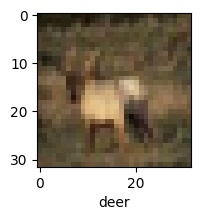

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3041 - loss: 1.9302
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4187 - loss: 1.6436
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4573 - loss: 1.5512
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4753 - loss: 1.4891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4957 - loss: 1.4366


In [ ]:
print(y_test)
print(y_test.shape)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print(f'Classification Report:{classification_report(y_test,y_pred_classes)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1000
           1       0.69      0.52      0.60      1000
           2       0.44      0.22      0.29      1000
           3       0.37      0.28      0.32      1000
           4       0.45      0.42      0.43      1000
           5       0.37      0.43      0.40      1000
           6       0.46      0.67      0.54      1000
           7       0.55      0.53      0.54      1000
           8       0.59      0.65      0.62      1000
           9       0.51      0.63      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # max pooling keeps the strongest features which reduces the size. Makes network fast, generalizes better and reduces overfitting.
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.2),                                   # dropout 0.2 for eliminating few neurons for generalizing better(regularization approach)
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# EARLY STOPPING APPROACH:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
cnn.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=15,callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3751 - loss: 1.7076 - val_accuracy: 0.5728 - val_loss: 1.2055
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5828 - loss: 1.1727 - val_accuracy: 0.6460 - val_loss: 1.0161
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6483 - loss: 1.0058 - val_accuracy: 0.6809 - val_loss: 0.9195
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6860 - loss: 0.8899 - val_accuracy: 0.6927 - val_loss: 0.8895
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7115 - loss: 0.8161 - val_accuracy: 0.6878 - val_loss: 0.9208
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7362 - loss: 0.7433 - val_accuracy: 0.7108 - val_loss: 0.8412
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7536 - loss: 0.6954 - val_accuracy: 0.7054 - val_loss: 0.8907
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7725 - loss: 0.6

with CNN at the 5th epoch, the accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives better accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6962 - loss: 0.9296


[0.9449055790901184, 0.6934000253677368]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

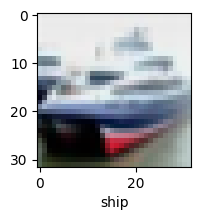

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.76194264e-04, 1.04156235e-04, 3.96615651e-05, 8.61293018e-01,
        2.68117747e-05, 3.85447629e-02, 2.52927863e-03, 1.80548943e-06,
        9.66375396e-02, 1.46722115e-04],
       [1.81702443e-03, 2.63390522e-02, 7.07627919e-07, 1.47490334e-06,
        2.14677712e-07, 2.72601195e-08, 2.40636258e-08, 7.94985500e-09,
        9.71761763e-01, 7.97213143e-05],
       [5.73710315e-02, 7.62541965e-02, 3.09146428e-03, 1.68459211e-02,
        2.83218618e-03, 1.74194365e-03, 3.26820096e-04, 1.14153549e-02,
        7.98195004e-01, 3.19260918e-02],
       [7.88021147e-01, 4.81993034e-02, 2.65391986e-03, 1.11525692e-03,
        6.23391429e-03, 3.54843905e-05, 1.55417787e-04, 6.08417147e-04,
        1.52776077e-01, 2.01080518e-04],
       [1.33344846e-08, 5.37908704e-07, 9.86753590e-03, 1.33470325e-02,
        8.84090126e-01, 1.02395914e-03, 9.16611031e-02, 1.48689423e-06,
        8.00534781e-06, 1.20771702e-07]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

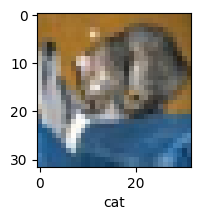

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomZoom

In [ ]:
# data augmentation
data_augmentation=Sequential([
    RandomZoom(0.3),
])

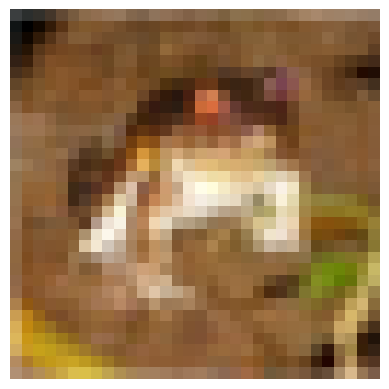

In [ ]:
plt.axis('off')
plt.imshow(X_train[0])

In [ ]:
data_augmentation(X_train)[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.23137255, 0.24313726, 0.24705882],
        [0.20667225, 0.21843696, 0.21927097],
        [0.18058175, 0.18380767, 0.17305508],
        ...,
        [0.60632503, 0.5021504 , 0.41024655],
        [0.5865673 , 0.48781827, 0.4023778 ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.16499047, 0.17829895, 0.18067674],
        [0.14029017, 0.15116777, 0.15167345],
        [0.12159472, 0.11682795, 0.10493002],
        ...,
        [0.5540361 , 0.43596753, 0.32929826],
        [0.54217523, 0.4276602 , 0.32771808],
        [0.5402542 , 0.42915505, 0.33290818]],

       [[0.0781149 , 0.0852624 , 0.08013913],
        [0.05812053, 0.05640384, 0.04859147],
        [0.06921902, 0.0345406 , 0.00594951],
        ...,
        [0.4707433 , 0.3320183 , 0.20089877],
        [0.46101114, 0.321177  , 0.19719085],
        [0.45623055, 0.3172679 , 0.19791308]],

       ...,

       [[0.7536996 , 0.59803855, 0.3764706 ],
        [0.7428